In [2]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install ipywidgets
!{sys.executable} -m pip install IPython

# Data Cleaning

In [3]:
import pandas as pd

# File paths for the CSV files
city_temperature_file_path = "city_temperature.csv"
emission_data_file_path = "emission.csv"
global_temperature_file_path = "global_temperature.csv"

# Read CSV data with specified data types
city_temperature_df = pd.read_csv(city_temperature_file_path, dtype={'Year': int, 'Month': int}, low_memory=False)
emission_data_df = pd.read_csv(emission_data_file_path, dtype={'Year': int, 'Emission_CO2_mt': float}, low_memory=False)
global_temperature_df = pd.read_csv(global_temperature_file_path, dtype={'Year': int, 'Global_Average_Temperature_Celsius': float}, low_memory=False)

# Display the read data
print("City Temperature Data:")
print(city_temperature_df)

print("\nEmission Data:")
print(emission_data_df)

print("\nGlobal Temperature Data:")
print(global_temperature_df)


City Temperature Data:
                Region  Country                   State                  City  \
0               Africa  Algeria                     NaN               Algiers   
1               Africa  Algeria                     NaN               Algiers   
2               Africa  Algeria                     NaN               Algiers   
3               Africa  Algeria                     NaN               Algiers   
4               Africa  Algeria                     NaN               Algiers   
...                ...      ...                     ...                   ...   
2906322  North America       US  Additional Territories  San Juan Puerto Rico   
2906323  North America       US  Additional Territories  San Juan Puerto Rico   
2906324  North America       US  Additional Territories  San Juan Puerto Rico   
2906325  North America       US  Additional Territories  San Juan Puerto Rico   
2906326  North America       US  Additional Territories  San Juan Puerto Rico   

    

In [4]:
# Drop irrelevant columns and rename columns
city_temperature_df = city_temperature_df[['Country', 'City', 'Month', 'Day', 'Year', 'AvgTemperature']]
city_temperature_df.rename(columns={'AvgTemperature': 'Average_Temperature_Celsius'}, inplace=True)

# Drop rows with missing values
city_temperature_df.dropna(inplace=True)

# Convert 'Year', 'Month', and 'Day' to integers
city_temperature_df['Year'] = city_temperature_df['Year'].astype(int)
city_temperature_df['Month'] = city_temperature_df['Month'].astype(int)
city_temperature_df['Day'] = city_temperature_df['Day'].astype(int)

# Display cleaned data
print("Cleaned City Temperature Data:")
print(city_temperature_df.head())


Cleaned City Temperature Data:
   Country     City  Month  Day  Year  Average_Temperature_Celsius
0  Algeria  Algiers      1    1  1995                         64.2
1  Algeria  Algiers      1    2  1995                         49.4
2  Algeria  Algiers      1    3  1995                         48.8
3  Algeria  Algiers      1    4  1995                         46.4
4  Algeria  Algiers      1    5  1995                         47.9


In [5]:
# Drop rows with missing values
emission_data_df.dropna(inplace=True)

# Drop the 'World' row as it seems to contain aggregated data
emission_data_df = emission_data_df[emission_data_df['Country'] != 'World']

# Convert emission data columns to numeric (excluding 'Country')
emission_data_df.iloc[:, 1:] = emission_data_df.iloc[:, 1:].apply(pd.to_numeric)

# Display cleaned data
print("\nCleaned Emission Data:")
print(emission_data_df.head())



Cleaned Emission Data:
            Country  1751  1752  1753  1754  1755  1756  1757  1758  1759  \
0       Afghanistan     0     0     0     0     0     0     0     0     0   
1            Africa     0     0     0     0     0     0     0     0     0   
2           Albania     0     0     0     0     0     0     0     0     0   
3           Algeria     0     0     0     0     0     0     0     0     0   
4  Americas (other)     0     0     0     0     0     0     0     0     0   

   ...          2008          2009          2010          2011          2012  \
0  ...  8.515264e+07  9.191295e+07  1.003652e+08  1.125912e+08  1.233332e+08   
1  ...  3.183077e+10  3.301904e+10  3.421283e+10  3.541120e+10  3.664504e+10   
2  ...  2.287948e+08  2.331696e+08  2.377643e+08  2.430001e+08  2.479062e+08   
3  ...  2.894820e+09  3.015005e+09  3.132819e+09  3.252626e+09  3.380736e+09   
4  ...  7.746025e+10  7.961787e+10  8.187178e+10  8.416656e+10  8.654197e+10   

           2013          2014   

In [6]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Load the Global Temperature Data (assuming global_temperature_df is loaded)
# Replace this with your actual data loading code
# global_temperature_df = pd.read_csv('global_temperature.csv')

# Check if global_temperature_df is loaded
if 'global_temperature_df' not in globals():
    raise ValueError("global_temperature_df is not defined. Please load your data.")

# Check if the expected columns are available in global_temperature_df
expected_columns = ['dt', 'AverageTemperature', 'Country']
if not all(col in global_temperature_df.columns for col in expected_columns):
    raise ValueError("Expected columns not found in global_temperature_df. Please check your data.")

# Drop irrelevant columns and rename columns
global_temperature_df = global_temperature_df[['dt', 'AverageTemperature', 'Country']]
global_temperature_df.rename(columns={'dt': 'Date', 'AverageTemperature': 'Average_Temperature_Celsius', 'Country': 'Country'}, inplace=True)

# Drop rows with missing values
global_temperature_df.dropna(inplace=True)

# Convert 'Date' to datetime
global_temperature_df['Date'] = pd.to_datetime(global_temperature_df['Date'])

# Display cleaned data
print("\nCleaned Global Temperature Data:")
print(global_temperature_df.head())



Cleaned Global Temperature Data:
        Date  Average_Temperature_Celsius Country
0 1743-11-01                        4.384   Åland
5 1744-04-01                        1.530   Åland
6 1744-05-01                        6.702   Åland
7 1744-06-01                       11.609   Åland
8 1744-07-01                       15.342   Åland


# Visualization and GUI

## Global Temperature 

Select a country and year to view its average temperature:


Dropdown(description='Select a Country:', index=102, options=('Åland', 'Afghanistan', 'Africa', 'Albania', 'Al…

Dropdown(description='Select a Year:', index=153, options=(1743, 1744, 1745, 1750, 1751, 1752, 1753, 1754, 175…

<Figure size 640x480 with 0 Axes>

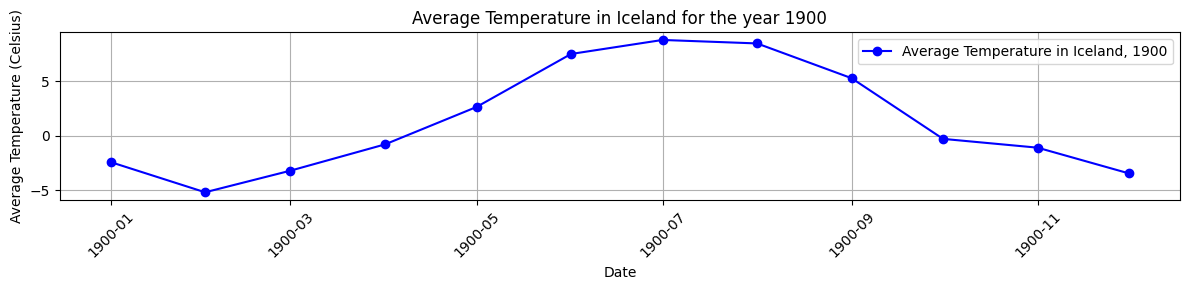

<Figure size 640x480 with 0 Axes>

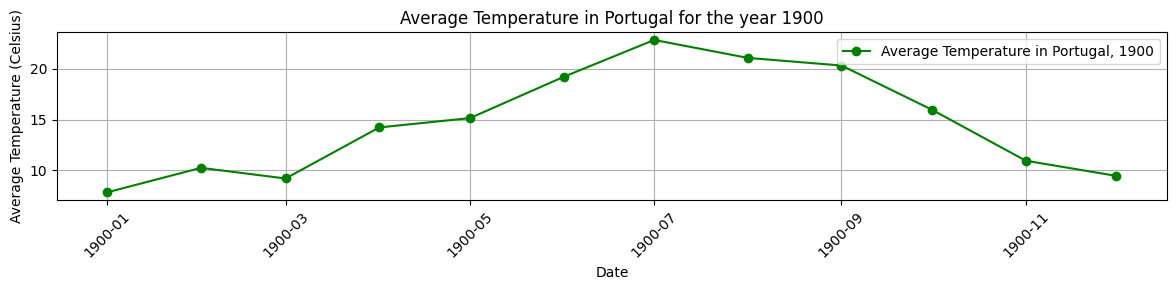

<Figure size 640x480 with 0 Axes>

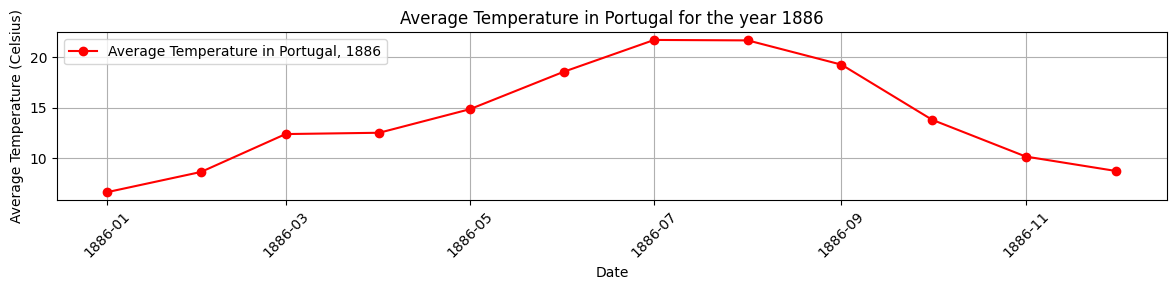

In [7]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Load the cleaned Global Temperature Data
# Assuming global_temperature_df is already loaded and cleaned

# Get unique countries and years from the dataset
unique_countries = global_temperature_df['Country'].unique()
unique_years = global_temperature_df['Date'].dt.year.unique()

# Set the default year to 1900
default_year = 1900

# Create widgets for country and year selection
country_dropdown = widgets.Dropdown(options=unique_countries, value='Iceland', description='Select a Country:')
year_dropdown = widgets.Dropdown(options=unique_years, value=default_year, description='Select a Year:')

# Define a set of colors to cycle through
plot_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Initialize color index
color_index = 0

# Create a function to update the plot based on the selected country and year
def update_plot(change):
    global color_index
    
    country = country_dropdown.value
    year = year_dropdown.value
    filtered_data = global_temperature_df[(global_temperature_df['Country'] == country) & 
                                          (global_temperature_df['Date'].dt.year == year)]
    
    # Clear previous plot
    plt.clf()
    
    # Plot the data with the current color
    plt.figure(figsize=(12, 3))
    plt.plot(filtered_data['Date'], filtered_data['Average_Temperature_Celsius'], 
             marker='o', linestyle='-', color=plot_colors[color_index], 
             label=f'Average Temperature in {country}, {year}')
    
    plt.xlabel('Date')
    plt.ylabel('Average Temperature (Celsius)')
    plt.title(f'Average Temperature in {country} for the year {year}')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Cycle to the next color
    color_index = (color_index + 1) % len(plot_colors)

# Attach the event handler to the country and year dropdowns
country_dropdown.observe(update_plot, names='value')
year_dropdown.observe(update_plot, names='value')

# Display the widgets and initial plot
print("Select a country and year to view its average temperature:")
display(country_dropdown)
display(year_dropdown)
update_plot(None)  # Display the initial plot for Iceland in 1900


## Yearly CO2 Emission Temperature

Select a country and starting year to view emission data:


Dropdown(description='Select a Country:', options=('Afghanistan', 'Africa', 'Albania', 'Algeria', 'Americas (o…

Dropdown(description='Select a Year:', index=259, options=(1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 175…

<Figure size 640x480 with 0 Axes>

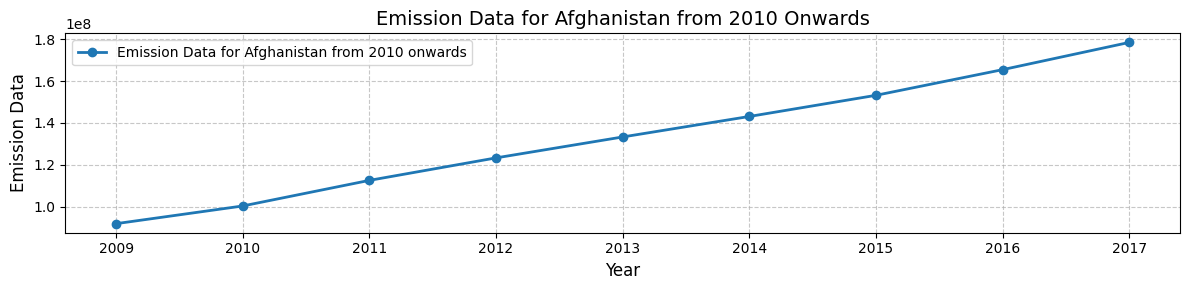

<Figure size 640x480 with 0 Axes>

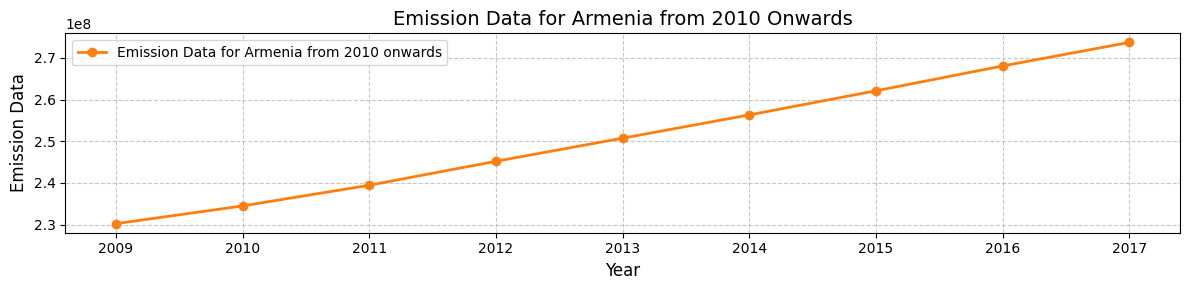

<Figure size 640x480 with 0 Axes>

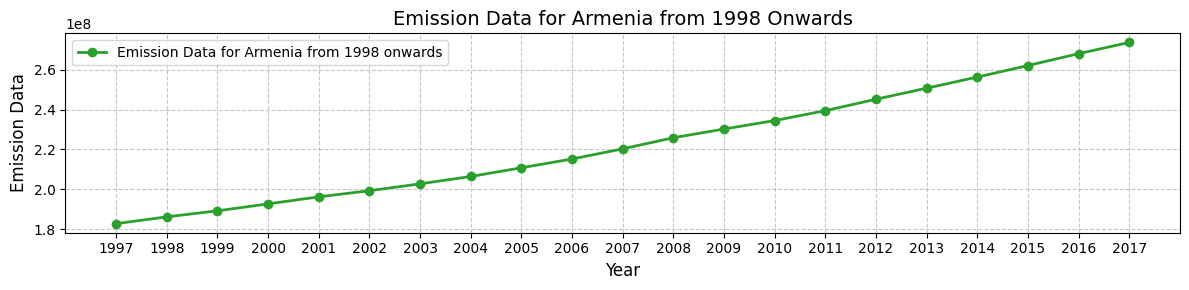

<Figure size 640x480 with 0 Axes>

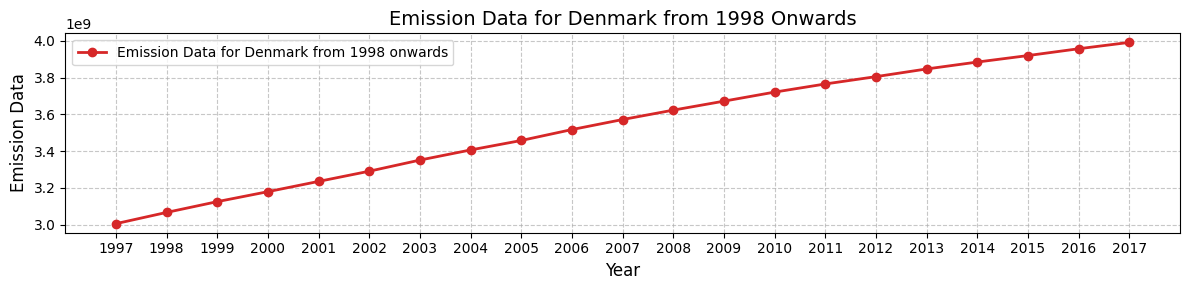

In [8]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Load the cleaned Emission Data
# Assuming emission_data_df is already loaded and cleaned

# Get unique countries and years from the dataset
unique_countries = emission_data_df['Country'].unique()
unique_years = emission_data_df.columns[1:].astype(int)  # Years start from the second column

# Set the default year to 2010
default_year = 2010

# Create widgets for country and year selection
country_dropdown_emission = widgets.Dropdown(options=unique_countries, value='Afghanistan', description='Select a Country:')
year_dropdown_emission = widgets.Dropdown(options=unique_years, value=default_year, description='Select a Year:')

import itertools

# Define a color cycle
color_cycle = itertools.cycle(plt.cm.tab10.colors)

def update_plot_emission(change):
    country = country_dropdown_emission.value
    selected_year = year_dropdown_emission.value
    
    # Clear previous plot
    plt.clf()
    
    # Plot the data for the selected country and year onwards
    data = emission_data_df[emission_data_df['Country'] == country].iloc[:, selected_year - unique_years[0]:]
    
    plt.figure(figsize=(12, 3))
    
    # Get the next color from the cycle
    color = next(color_cycle)
    
    # Plot the data with customizations and the current color
    plt.plot(data.columns, data.values.flatten(), 
             marker='o', linestyle='-', color=color, linewidth=2, label=f'Emission Data for {country} from {selected_year} onwards')
    
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Emission Data', fontsize=12)
    plt.title(f'Emission Data for {country} from {selected_year} Onwards', fontsize=14)
    
    # Customize the appearance of the grid
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Customize legend
    plt.legend(fontsize=10)
    
    plt.tight_layout()
    plt.show()

# Attach the event handler to the country and year dropdowns
country_dropdown_emission.observe(update_plot_emission, names='value')
year_dropdown_emission.observe(update_plot_emission, names='value')

# Display the widgets and initial plot for the selected country and year
print("Select a country and starting year to view emission data:")
display(country_dropdown_emission)
display(year_dropdown_emission)
update_plot_emission(None)  # Display the initial plot for the selected country and year


## Yearly Average Temperature

Select countries to compare their average temperatures:


<Figure size 640x480 with 0 Axes>

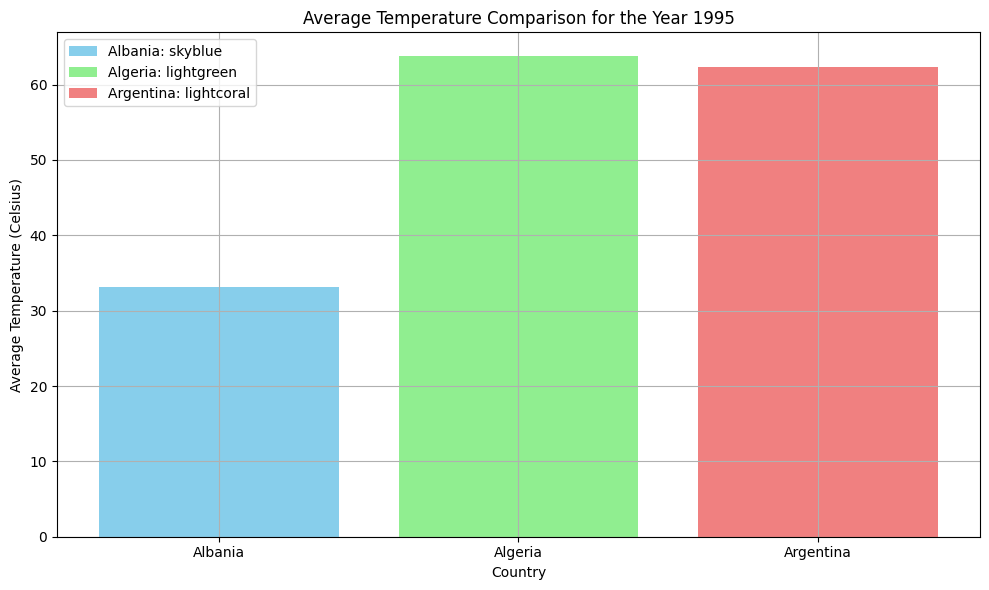

<Figure size 640x480 with 0 Axes>

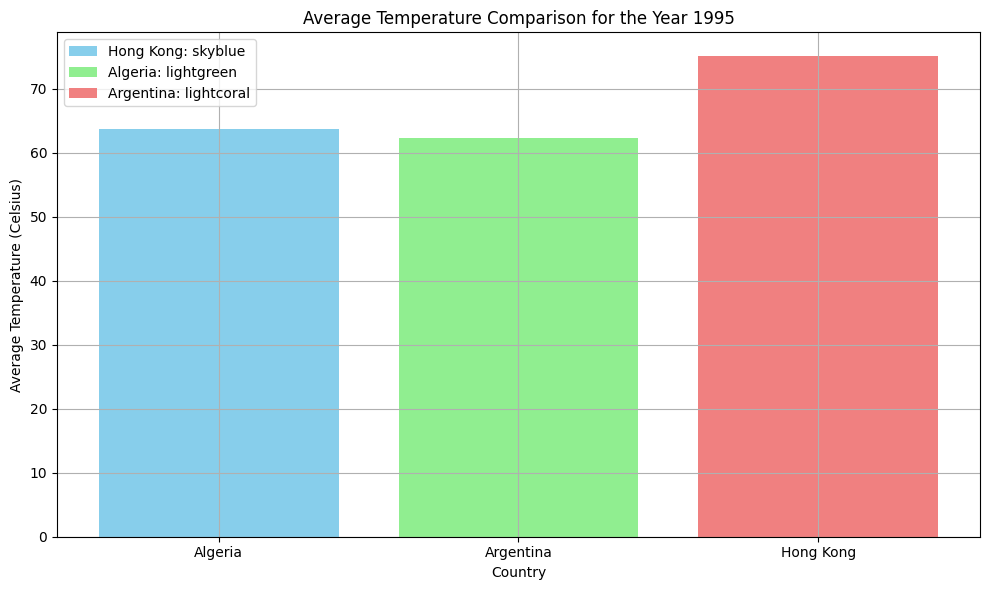

<Figure size 640x480 with 0 Axes>

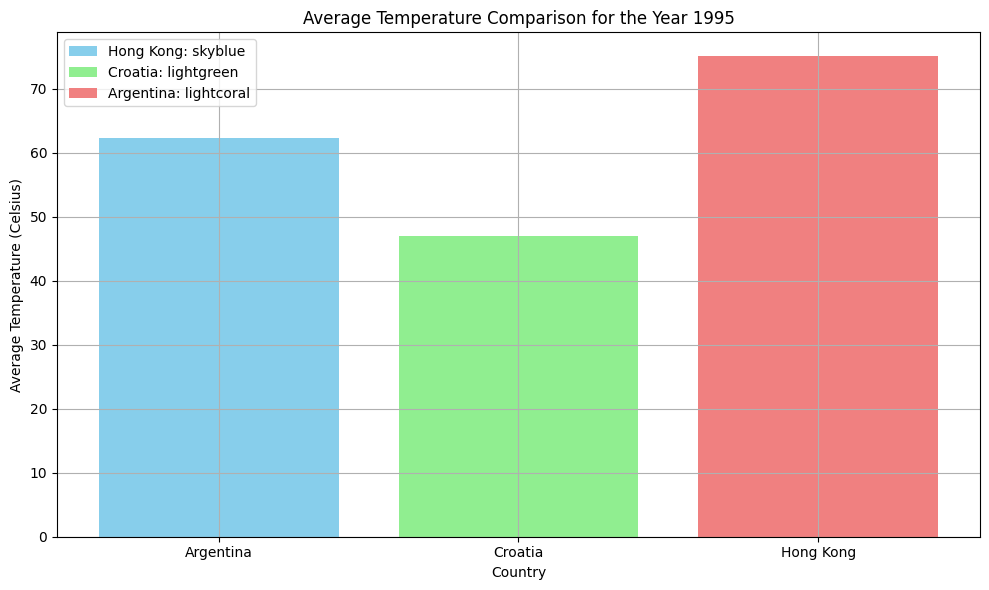

In [9]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display

# Assuming city_temperature_df is the provided DataFrame

# Calculate the average temperature for each city
average_temp_by_city = city_temperature_df.groupby(['Country', 'City'])['Average_Temperature_Celsius'].mean().reset_index()

# Get unique countries and years from the dataset
unique_countries = average_temp_by_city['Country'].unique()

# Set the default year to 1995
default_year = 1995

# Create widgets for country and year selection
country_dropdown1 = widgets.Dropdown(options=unique_countries, value=unique_countries[0], description='Select Country 1:')
country_dropdown2 = widgets.Dropdown(options=unique_countries, value=unique_countries[1], description='Select Country 2:')
country_dropdown3 = widgets.Dropdown(options=unique_countries, value=unique_countries[2], description='Select Country 3:')
year_dropdown_country = widgets.Dropdown(options=[default_year], value=default_year, description='Year:')

# Create a function to update the plot based on the selected countries and year
def update_plot_country(change):
    country1 = country_dropdown1.value
    country2 = country_dropdown2.value
    country3 = country_dropdown3.value
    selected_year = year_dropdown_country.value
    
    # Filter data for the selected countries and year
    filtered_data = average_temp_by_city[(average_temp_by_city['Country'].isin([country1, country2, country3]))]
    
    # Clear previous plot
    plt.clf()
    
    # Assign a different color to each bar
    colors = ['skyblue', 'lightgreen', 'lightcoral']
    
    # Create a bar graph to compare the average temperatures of the selected countries
    plt.figure(figsize=(10, 6))
    bars = plt.bar(filtered_data['Country'], filtered_data['Average_Temperature_Celsius'], color=colors)
    plt.xlabel('Country')
    plt.ylabel('Average Temperature (Celsius)')
    plt.title(f'Average Temperature Comparison for the Year {selected_year}')
    plt.grid(True)
    
    # Add legend indicating the colors for each country
    legend_labels = [f'{country}: {color}' for country, color in zip([country1, country2, country3], colors)]
    plt.legend(bars, legend_labels)
    
    plt.tight_layout()
    plt.show()

# Attach the event handler to the country and year dropdowns
country_dropdown1.observe(update_plot_country, names='value')
country_dropdown2.observe(update_plot_country, names='value')
country_dropdown3.observe(update_plot_country, names='value')
year_dropdown_country.observe(update_plot_country, names='value')

# Arrange widgets in a structured layout using a box
widget_box = widgets.VBox([
    widgets.HBox([country_dropdown1, country_dropdown2, country_dropdown3]),
    year_dropdown_country
])

# Display the widgets and initial plot for the selected countries and year
print("Select countries to compare their average temperatures:")
display(widget_box)
update_plot_country(None)  # Display the initial plot for the selected countries and year
